# Defining Mesh

Firstly, the mesh will be rectangular in shape with an x-dimension length of $L_x$ metres and a y-dimension length of $L_y$ metres. 


*** define structured mesh ***

This spatial domain is divided into computational cells with x-dimensions of $dx$ metres y-dimensions of $dy$ metres

The number of cell in the x-direction = $n_x$

The number of cell in the y-direction = $n_y$


<img src="./Paper_Images/Mesh.jpg" alt="Drawing" style="width: 600px;"/> 

In [1]:
# Defining these values:

Lx = 1 #width of domain
Ly = 1 #height of domain

# This can be changed later
nx = 4    #number of cells in the x-direction
ny = 4    #number of cells in the y-direction

dy = Ly/ny          #length of each control volume in the y-direction
dx = Lx/nx          #length of each control volume in the x-direction

### Indexing convention

Next we'll determine an indexing convention that will assign an ID number to each cell and boundary face, marked below:

<img src="./Paper_Images/MeshWithPoints.jpg" alt="Drawing" style="width: 600px;"/> 

In [2]:
import numpy as np

The following functions visualises the mesh and the point IDs. Feel free to play around with Lx, Ly, nx and ny values:

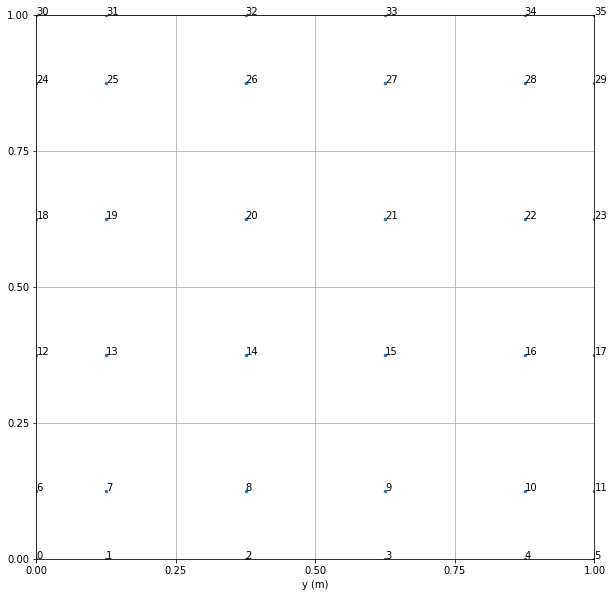

In [3]:
from ipynb.fs.full.Background_Functions import visualiseMesh

visualiseMesh(Lx, Ly, nx, ny)

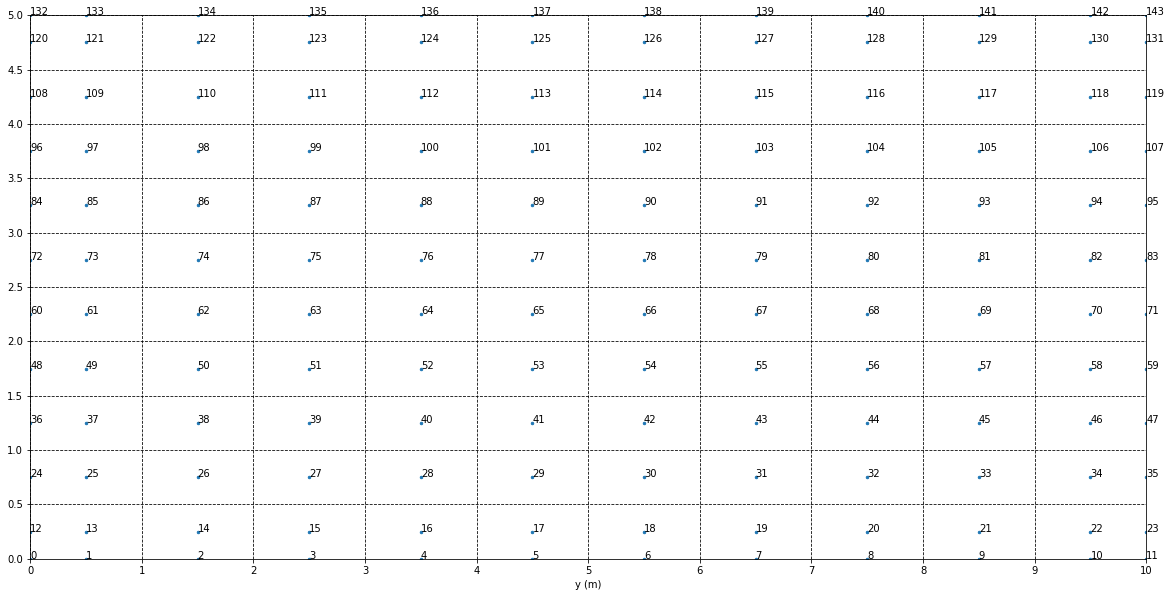

In [7]:
# Example with different values
Lx, Ly, nx, ny = 10, 5, 10, 10

visualiseMesh(Lx, Ly, nx, ny)

### Displacement Fields

Each point on the above mesh is a point in the displacment field $\boldsymbol{u} (x,y)$. The $\boldsymbol{u}$ field can be thought as the change in displacement from it's original position, not the the coordinates x and y. Therefore we can initialise the $\boldsymbol{u}$ field to be equal to zero for all points in all directions. 

As our mesh is 2D the $\boldsymbol{u} (x,y)$ is made up of change of displacment in the x-direction $u$ and in the y-direction $v$. 

In [8]:
# initialising u field: 

def initaliseUfield (nx, ny):    
    
    # create an zero array for the u and v values for each point
    U = np.zeros([(ny+2)*(nx+2),2])

    return U


U = initaliseUfield(nx, ny)

For clarity when coding, we will refer to:

- <code>U</code> as the displacement field $\boldsymbol{u}$
- <code>u</code> as displacement vector in the x-direction $u$
- <code>v</code> as displacement vector in the y-direction $v$

In [9]:
# the shape of U:
print(U.shape)

#This value is the number of points in the mesh
print("Number of points in Mesh: " + str(U.shape[0]))

# This is the number of dmension, i.e x & y 
print("Number of dimensions: " + str(U.shape[1]))

(144, 2)
Number of points in Mesh: 144
Number of dimensions: 2
